# Heart Attack Analysis & Prediction Dataset
A dataset for heart attack classification

## About this dataset

1. Age : Age of the patient
2. Sex : Sex of the patient
3. exang: exercise induced angina (1 = yes; 0 = no)
4. ca: number of major vessels (0-3)
5. cp : Chest Pain type chest pain type

    .Value 1: typical angina

    .Value 2: atypical angina

    .Value 3: non-anginal pain

    .Value 4: asymptomatic

6. trtbps : resting blood pressure (in mm Hg)
7. chol : cholestoral in mg/dl fetched via BMI sensor
8. fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
9. rest_ecg : resting electrocardiographic results   

    .Value 0: normal

    .Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

    .Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria


10. thalach : maximum heart rate achieved
11. target : 0= less chance of heart attack 1= more chance of heart attack

  


# Steps Undertaken

1.Import all the neceassary modules and load the data

2.Exploratory Data Analysis

3.preprocessing 

4.feature selection

5.Train the Model on the Data Split

6.Model selection

7.Model Evaluation

## Import all the neceassary modules and load the data 

In [2]:
#importing modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.model_selection import GridSearchCV

In [3]:
#loading heart CSV dataset
DF = pd.read_csv("heart.csv")
DF

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
DF = DF.drop(labels=None, axis=0, index=None, columns=["oldpeak","slp","caa","thall"], 
               level=None, inplace=False, errors='raise')

In [5]:
#loading o2Saturation csv data 
DF2 = pd.read_csv("o2Saturation.csv").head(303)
DF2

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5
...,...
298,97.5
299,97.5
300,97.5
301,97.5


In [6]:
#initating o2Saturation dataframe to one new column of heart dataframe
DF["o2Saturation"]=DF2["98.6"]
DF

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,output,o2Saturation
0,63,1,3,145,233,1,0,150,0,1,98.6
1,37,1,2,130,250,0,1,187,0,1,98.6
2,41,0,1,130,204,0,0,172,0,1,98.6
3,56,1,1,120,236,0,1,178,0,1,98.1
4,57,0,0,120,354,0,1,163,1,1,97.5
...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0,97.5
299,45,1,3,110,264,0,1,132,0,0,97.5
300,68,1,0,144,193,1,1,141,0,0,97.5
301,57,1,0,130,131,0,1,115,1,0,97.5


In [7]:
# changing column position of o2Saturation column(not necessary)
o2_column = DF.pop('o2Saturation')
DF.insert(9, 'o2Saturation', o2_column)
DF





,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,o2Saturation,output
0,63,1,3,145,233,1,0,150,0,98.6,1
1,37,1,2,130,250,0,1,187,0,98.6,1
2,41,0,1,130,204,0,0,172,0,98.6,1
3,56,1,1,120,236,0,1,178,0,98.1,1
4,57,0,0,120,354,0,1,163,1,97.5,1
...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,97.5,0
299,45,1,3,110,264,0,1,132,0,97.5,0
300,68,1,0,144,193,1,1,141,0,97.5,0
301,57,1,0,130,131,0,1,115,1,97.5,0


## Exploratory Data Analysis 

In [8]:
#detail information of dataset 
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    int64  
 1   sex           303 non-null    int64  
 2   cp            303 non-null    int64  
 3   trtbps        303 non-null    int64  
 4   chol          303 non-null    int64  
 5   fbs           303 non-null    int64  
 6   restecg       303 non-null    int64  
 7   thalachh      303 non-null    int64  
 8   exng          303 non-null    int64  
 9   o2Saturation  303 non-null    float64
 10  output        303 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 26.2 KB


In [9]:
#deatil staticstical representation
DF.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,o2Saturation,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,97.480858,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,0.346740,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,96.500000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,97.500000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,97.500000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,97.500000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,98.600000,1.000000


In [10]:
def distribution_plot(DF,variable):
    sns.distplot(DF[variable])
    

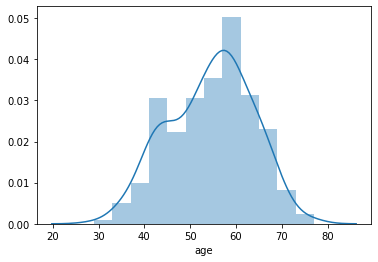

In [11]:
distribution_plot(DF,"age")


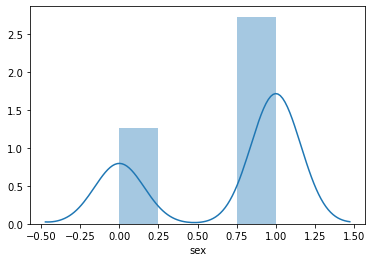

In [12]:
distribution_plot(DF,"sex")

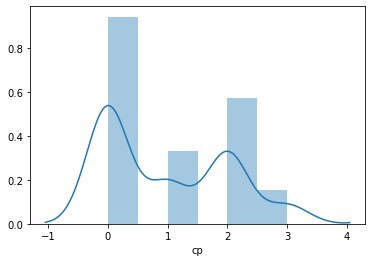

In [13]:
distribution_plot(DF,"cp")

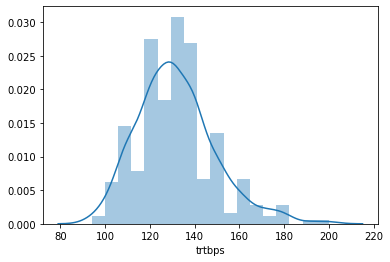

In [14]:
distribution_plot(DF,"trtbps")

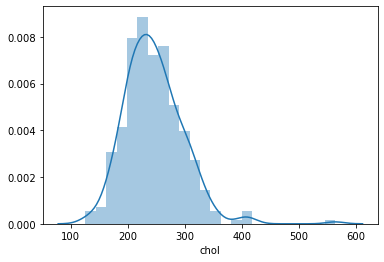

In [15]:
distribution_plot(DF,"chol")

C:\Users\Priyam\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


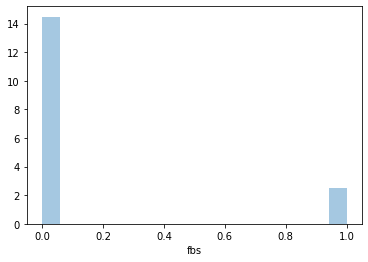

In [16]:
distribution_plot(DF,"fbs")

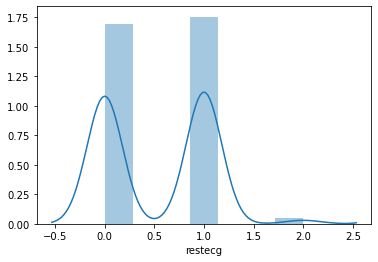

In [17]:
distribution_plot(DF,"restecg")

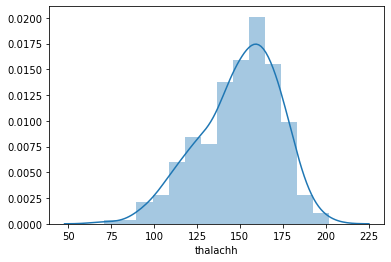

In [18]:
distribution_plot(DF,"thalachh")

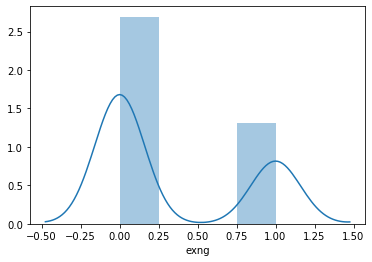

In [19]:
distribution_plot(DF,"exng")

C:\Users\Priyam\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


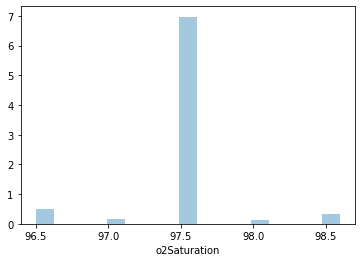

In [20]:
distribution_plot(DF,"o2Saturation")

## Preprocessing

### QQ-Plot

In [21]:
def diagnostic_plot(DF,variable):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    DF[variable].hist()
    
    plt.subplot(1,2,2)
    stats.probplot(DF[variable],dist="norm",plot=plt)
    
    plt.show()

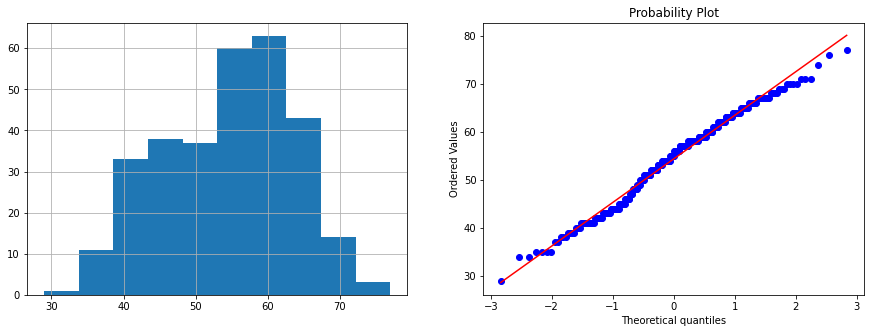

In [22]:
diagnostic_plot(DF,"age")

### Logarthmic Transformation 

In [23]:
def log_tansformation(DF,variable):
    DF["log"]=np.log(DF[variable]+1)
    diagnostic_plot(DF,'log')

### Reciprocal Transformation

In [24]:
def reciprocal_transformation(DF,variable):
    DF["reciprocal"]=1/(DF[variable]+1)
    diagnostic_plot(DF,'reciprocal')

### Square Root Transformation

In [25]:
def square_Root_transformation(DF,variable):
    DF["square_root"]=(DF[variable])**1/2
    diagnostic_plot(DF,'square_root')

### Exponential Transformation 

In [26]:
def Exponential_transformation(DF,variable):
    DF["Exponential"]=(DF[variable])**1/5
    diagnostic_plot(DF,'Exponential')

In [27]:
# age:age
# sex:gender
# cp:chestpain
# trtbps:  resting blood pressure (in mm Hg)
# chol:cholostrol
# fbs:(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
# rest_ecg : resting electrocardiographic results

In [28]:
X = DF.iloc[:,0:10]
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,o2Saturation
0,63,1,3,145,233,1,0,150,0,98.6
1,37,1,2,130,250,0,1,187,0,98.6
2,41,0,1,130,204,0,0,172,0,98.6
3,56,1,1,120,236,0,1,178,0,98.1
4,57,0,0,120,354,0,1,163,1,97.5
...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,97.5
299,45,1,3,110,264,0,1,132,0,97.5
300,68,1,0,144,193,1,1,141,0,97.5
301,57,1,0,130,131,0,1,115,1,97.5


In [29]:
#standarisation  : converting all value from -1 to 1
Scalar = StandardScaler()
DF_scalar = Scalar.fit_transform(X)

In [30]:
#converting into dataframe and giving name to every column
dataset = pd.DataFrame(DF_scalar,columns=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng',  'o2Saturation'])

In [31]:
x = dataset

### Feature selection

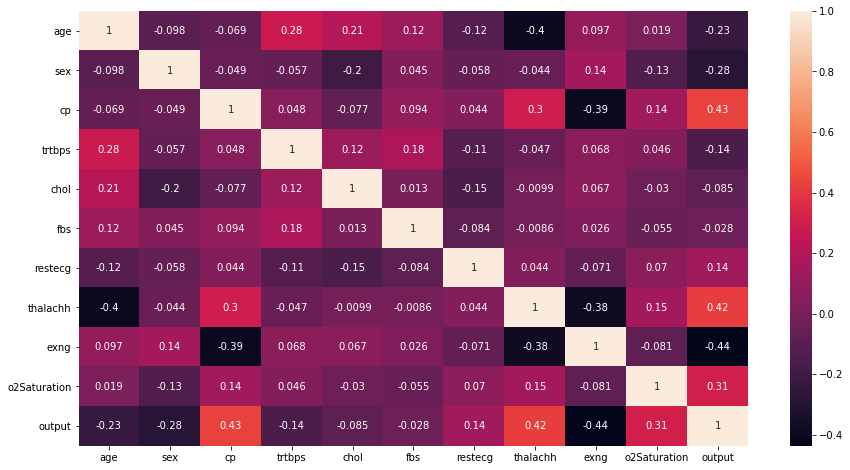

In [32]:
corelation = DF.corr()
plt.figure(figsize = (15,8))
sns.heatmap(corelation,annot=True)

### Train the Model on the Data Split 

In [33]:
#data spliting
x = dataset
y = DF.iloc[:,-1]

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=21)


## Logistic Regression

In [35]:
LR = LogisticRegression(C=11787686.347935867,penalty='l2')
LR.fit(X_train,y_train)


C:\Users\Priyam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=11787686.347935867)

In [36]:
# # Creating the hyperparameter grid
# c_space = np.logspace(-5, 8, 15)
# param_grid = {'C': c_space,
#               'penalty':['l2', 'l1']}
# # param_grid = dict(C=uniform(loc=0, scale=4),
# #                     penalty=['l2', 'l1'])
    
# # Instantiating the GridSearchCV object
# logreg_cv = GridSearchCV(LR, param_grid, cv = 5)

In [37]:
# Print the tuned parameters and score
# print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
# print("Best score is {}".format(logreg_cv.best_score_))
# log_reg = logreg_cv.fit(X_train,y_train)
# log_reg.best_params_
# # log_reg.best_score_

In [38]:
y_pre = LR.predict(X_test)
y_pre

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [39]:
LR.score(X_train,y_train)

0.7975206611570248

In [40]:
LR.score(X_test,y_test)

0.819672131147541

In [41]:
print("Accuracy of Logistic regresion",accuracy_score(y_test,y_pre))
print(classification_report(y_test,y_pre))

Accuracy of Logistic regresion 0.819672131147541
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        32
           1       0.82      0.79      0.81        29

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



Text(0.5, 1.1, 'Confusion matrix Logistic Regression\n')

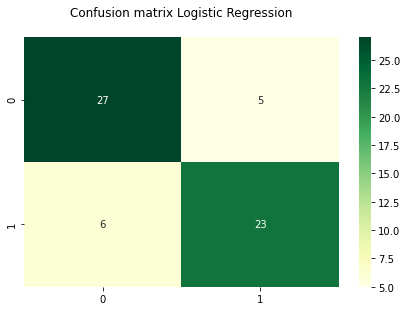

In [42]:
# plotting confusion matrix LogReg

cnf_matrix_log = confusion_matrix(y_test,y_pre)
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="YlGn" , fmt='g')
# ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

In [43]:
print(cross_val_score(LR,x,y,scoring = 'accuracy',cv=10))

[0.77419355 0.77419355 0.64516129 0.8        0.76666667 0.9
 0.86666667 0.73333333 0.86666667 0.83333333]


In [56]:
import pickle
#open a file , where you want to store the data
file = open("logistic_regression.pkl","wb")

#dump info into file 
pickle.dump(LR,file)


## SVM(Support Vector Machine)

In [44]:
svm = SVC(C=10,kernel='linear',degree=3)
svm.fit(X_train,y_train)


SVC(C=10, kernel='linear')

In [45]:
svm.score(X_train,y_train)

0.8223140495867769

In [46]:
svm.score(X_test,y_test)

0.8032786885245902

In [47]:
svm_pred = svm.predict(X_test)
svm_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [48]:
print("Accuracy score: ",accuracy_score(svm_pred,y_test))
print(classification_report(svm_pred,y_test))

Accuracy score:  0.8032786885245902
              precision    recall  f1-score   support

           0       0.84      0.79      0.82        34
           1       0.76      0.81      0.79        27

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



Text(0.5, 1.1, 'Confusion matrix Logistic Regression\n')

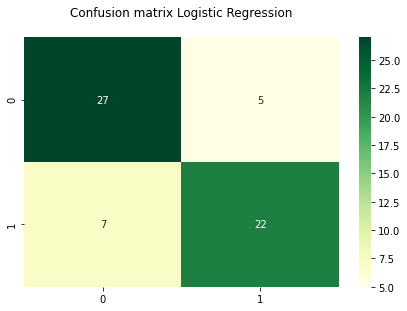

In [49]:
# plotting confusion matrix LogReg

cnf_matrix_log = confusion_matrix(y_test,svm_pred)
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="YlGn" ,fmt='g')
# ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

In [50]:
print(cross_val_score(svm,x,y,scoring = 'accuracy',cv=10))

[0.74193548 0.77419355 0.61290323 0.8        0.83333333 0.86666667
 0.8        0.73333333 0.86666667 0.8       ]


In [53]:
svm.predict([[57,0,0,140,241,0,1,123,1,97.5]])

array([0], dtype=int64)

In [55]:
import pickle
#open a file , where you want to store the data
file =open("SVM_heart.pkl",'wb')

#dump info to file
pickle.dump(svm,file)


## KNN(K Nearrest Neighbour) 

In [ ]:

KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)

KNN.score(X_train,y_train)

KNN_pred = KNN.predict(X_test)
KNN_pred

print("Accuracy Score: ",accuracy_score(KNN_pred,y_test))
print(classification_report(KNN_pred,y_test))

# plotting confusion matrix LogReg

cnf_matrix_log = confusion_matrix(y_test,KNN_pred)
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="YlGn" , fmt='g')
# ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

print(cross_val_score(KNN,x,y,scoring = 'accuracy',cv=10))

## Decision Tree

In [189]:
DTC = DecisionTreeClassifier(max_depth=10,criterion='entropy')
DTC.fit(x_train,y_train)


DTC.score(x_train,y_train)

DTC.score(x_test,y_test)

DTC_pred = DTC.predict(x_test)
DTC_pred

print("Accuracy score: ",accuracy_score(DTC_pred,y_test))
print(classification_report(DTC_pred,y_test))

# plotting confusion matrix LogReg

cnf_matrix_log = confusion_matrix(y_test,DTC_pred)
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="YlGn" , fmt='g')
# ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

print(cross_val_score(DTC,x,y,scoring = 'accuracy',cv=10))

DecisionTreeClassifier(criterion='entropy', max_depth=10)

## Random Forest

In [106]:
RF = RandomForestClassifier(max_depth=5)
RF.fit(X_train,y_train)

RF.score(X_train,y_train)

RF.score(X_test,y_test)

RF_pred=RF.predict(X_test)
RF_pred

print("Accuracy score: ",accuracy_score(RF_pred,y_test))
print(classification_report(RF_pred,y_test))

# plotting confusion matrix LogReg

cnf_matrix_log = confusion_matrix(y_test,RF_pred)
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="YlGn" , fmt='g')
# ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

print(cross_val_score(RF,x,y,scoring = 'accuracy',cv=10))

RandomForestClassifier(max_depth=5)